# Jupyter Notebook Version for calculating Pacific Impact on Sahelian Rain Fall

In [13]:
import numpy as np  # Used later
from spy4cast import Dataset, Region, Month
from spy4cast.spy4cast import Preprocess, MCA, Crossvalidation

## Configuration

In [2]:
predictor = Dataset("HadISST_sst-1970_2020.nc", "./datasets").open("sst").slice(
    Region(lat0=-30, latf=30,
           lon0=-200, lonf=-60,
           month0=Month.MAY, monthf=Month.JUL,
           year0=1976, yearf=2000),
)

predictand = Dataset("cru_ts4.06.1950.2010.nc", "./datasets").open("pre").slice(
    Region(lat0=0, latf=25,
           lon0=-20, lonf=20,
           month0=Month.AUG, monthf=Month.SEP,
           year0=1976, yearf=2000),
)
#  There is a lag of 3 months (from May to August)

## Methodology

### Preprocessing

In [3]:
# First step. Preprocess variables: anomaly and reshaping
predictor_preprocessed = Preprocess(predictor)
predictor_preprocessed.save("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# Save matrices as .npy for fast loading. To load use:
# predictor_preprocessed = Preprocess.load("y_", "./data-Pacific_Impact_Sahelian_Rainfall/")
predictand_preprocessed = Preprocess(predictand)
predictand_preprocessed.save("z_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# predictand_preprocessed = Preprocess.load("z_", "./data/-Pacific_Impact_Sahelian_Rainfall")

[INFO] Preprocessing data for variable sst took: 0.028 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/y_*.npy`
[INFO] Preprocessing data for variable pre took: 0.030 seconds
[INFO] Saving Preprocess data in `./data-Pacific_Impact_Sahelian_Rainfall/z_*.npy`


### MCA

In [4]:
# Second step. MCA: expansion coefficients and correlation and regression maps
nm = 3
alpha = 0.05
mca = MCA(predictor_preprocessed, predictand_preprocessed, nm, alpha)
mca.save("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# mca = MCA.load("mca_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Applying MCA 
    Shapes: Z(4000, 25) 
            Y(7200, 25) 
    Regions: Z AS (0.00ºN, 25.00ºN - 20.00ºW, 20.00ºE) 
            Y MJJ (30.00ºS, 30.00ºN - 200.00ºW, 60.00ºW)
       Took: 6.862 seconds
[INFO] Saving MCA data in `./data-Pacific_Impact_Sahelian_Rainfall/mca_*.npy`


### Crossvalidation

In [7]:
# Third step. Crossvalidation: skill and hidcast evaluation and products
cross = Crossvalidation(predictor_preprocessed, predictand_preprocessed, nm, alpha)
cross.save("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/")
# cross = Crossvalidation.load("cross_", "./data-Pacific_Impact_Sahelian_Rainfall/", dsy=predictor_preprocessed, dsz=predictand_preprocessed)

[INFO] Loading Crossvalidation data from `./data-Pacific_Impact_Sahelian_Rainfall/cross_*` took 0.015 seconds


## Plotting results

[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/mca.png
[INFO] Saving plot with path ./plots-Pacific_Impact_Sahelian_Rainfall/cross.png


(<Figure size 1700x800 with 7 Axes>,
 (<GeoAxes: title={'center': 'Correlation in space between z and zhat'}>,
  <Axes: title={'center': 'Correlation in space between z and zhat'}>,
  <Axes: title={'center': 'Squared convariance fraction'}>,
  <Axes: title={'center': 'Us for mode 1'}>,
  <Axes: title={'center': 'Us for mode 2'}>,
  <Axes: title={'center': 'Us for mode 3'}>))

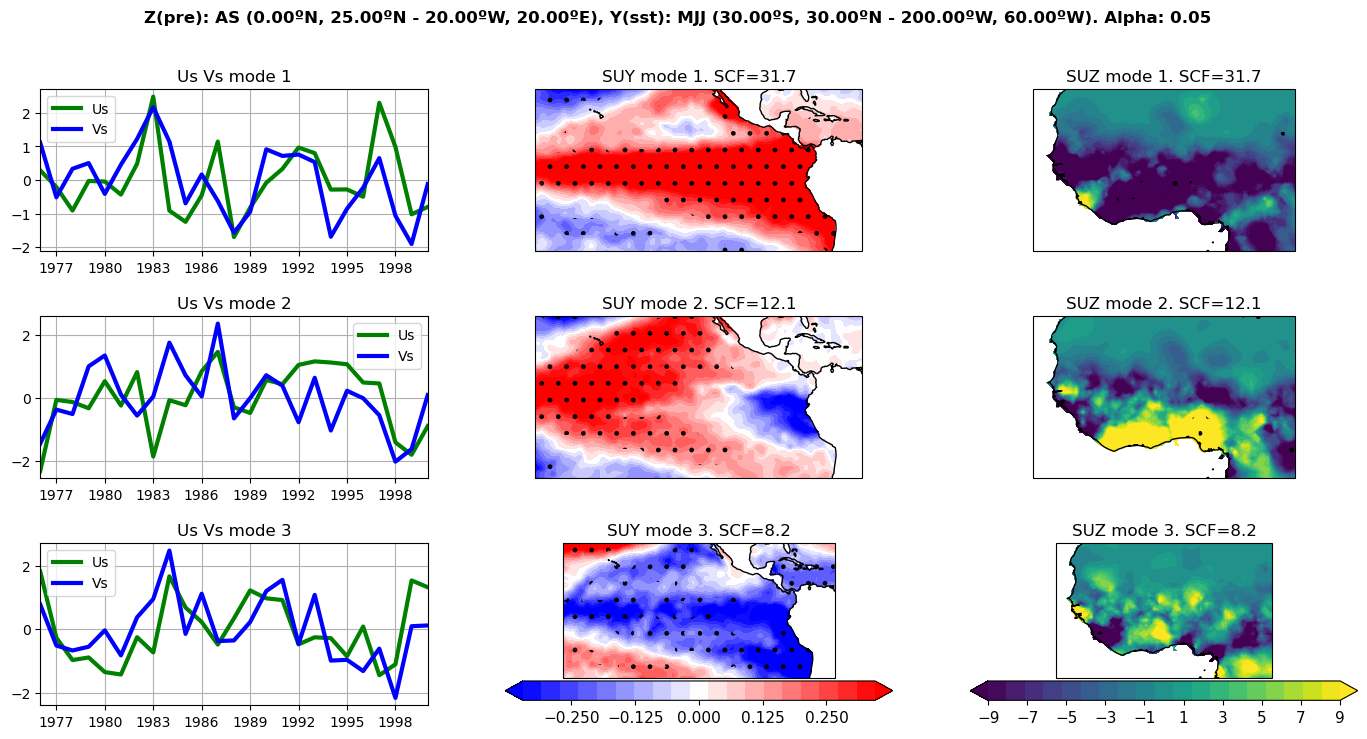

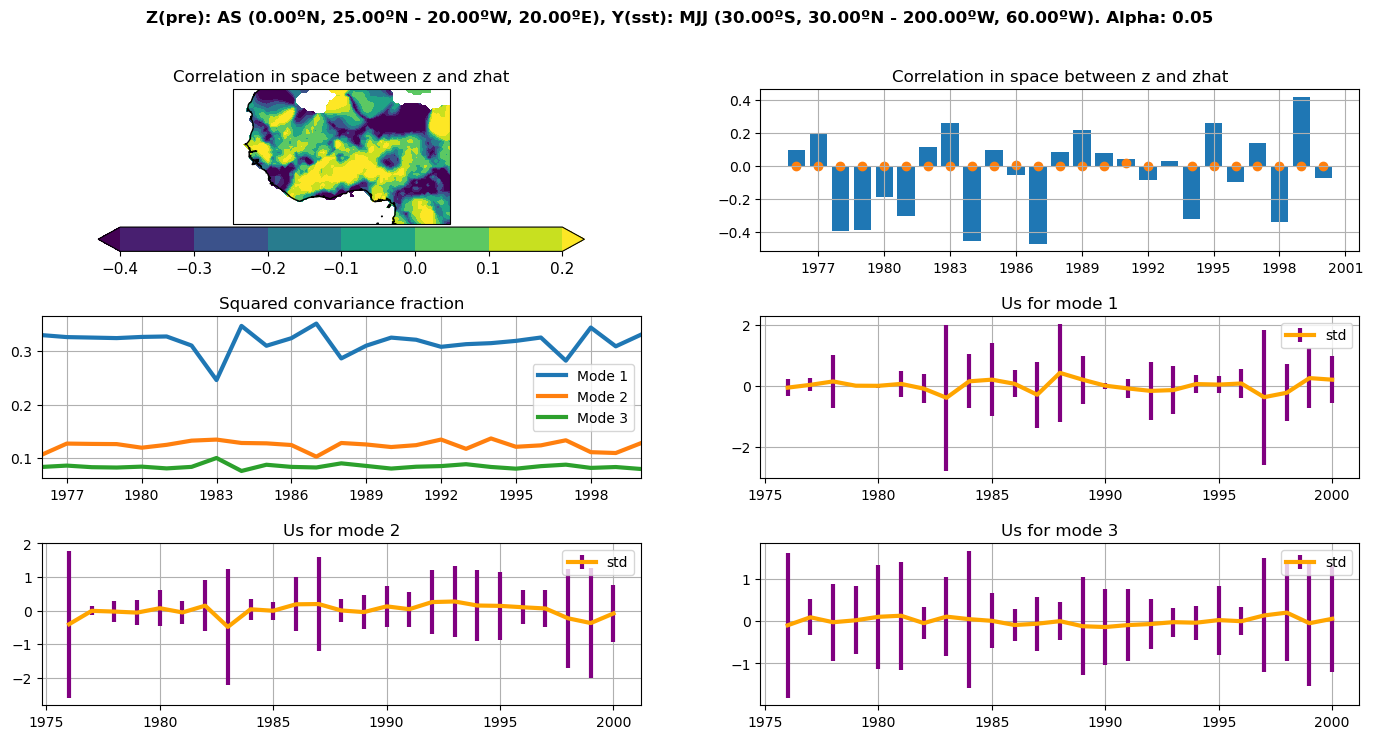

In [16]:
mca.plot(
    save_fig=True, cmap="viridis", name="mca.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    suy_ticks=[-0.25, -0.125, 0, 0.125, 0.250],
    suz_ticks=np.arange(-9, 11, 2))
cross.plot(
    save_fig=True, cmap="viridis", name="cross.png",
    folder="./plots-Pacific_Impact_Sahelian_Rainfall/",
    map_ticks=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2],
    map_levels=[-0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2],
)
cross.plot_zhat(1999, figsize=(12, 10), save_fig=True, name="zhat_1999.png", folder="./plots-Pacific_Impact_Sahelian_Rainfall/")